# PubTabNet Dataset

PubTabNet is a large dataset for image-based table recognition, containing 568k+ images of tabular data annotated with the corresponding HTML representation of the tables.
 
The dataset is open sourced by IBM Research Australia and is [available to download freely](https://developer.ibm.com/exchanges/data/all/pubtabnet/) on the IBM Developer [Data Asset Exchange](http://ibm.biz/data-exchange). 

This notebook can be found on [GitHub](https://github.com/ibm-aur-nlp/PubTabNet) and [Watson Studio](https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/0aa641b0-af25-4470-b9e1-6b33d6b5b66a/view?access_token=b7d5880bb60c253457a72e3ec76f9ab40ccc42c607331acdcbbbe21be4c46bc8).

In [1]:
# importing prerequisites
import sys
import requests
import tarfile
import jsonlines
import numpy as np
from os import path
from PIL import Image
from PIL import ImageFont, ImageDraw
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!which python

/home/liuzhuang/.conda/envs/open-mmlab/bin/python


## Download and Extract the Dataset

Since the dataset is large (~12GB), here we will be downloading a small subset of the data and extract it. 

In [3]:
fname = 'examples.tar.gz'
url = 'https://dax-cdn.cdn.appdomain.cloud/dax-pubtabnet/2.0.0/' + fname
r = requests.get(url)
open(fname , 'wb').write(r.content)

386348

In [3]:
# Extracting the dataset
tar = tarfile.open(fname)
tar.extractall()
tar.close()

NameError: name 'fname' is not defined

In [4]:
# Verifying the file was extracted properly
data_path = "examples/"
path.exists(data_path)

True

## Visualizing the Data

In this section, we visualize the raw image and extract it's HTML annotation from the JSON file. 
We further render the table using Jupyter notebook's inbuilt HTML capabilities. 

In [5]:
# Helper function to read in tables from the annotations
from bs4 import BeautifulSoup as bs
from html import escape

def format_html(img):
    ''' Formats HTML code from tokenized annotation of img
    '''
    html_code = img['html']['structure']['tokens'].copy()
    to_insert = [i for i, tag in enumerate(html_code) if tag in ('<td>', '>')]
    for i, cell in zip(to_insert[::-1], img['html']['cells'][::-1]):
        if cell['tokens']:
            cell = [escape(token) if len(token) == 1 else token for token in cell['tokens']]
            cell = ''.join(cell)
            html_code.insert(i + 1, cell)
    html_code = ''.join(html_code)
    html_code = '''<html>
                   <head>
                   <meta charset="UTF-8">
                   <style>
                   table, th, td {
                     border: 1px solid black;
                     font-size: 10px;
                   }
                   </style>
                   </head>
                   <body>
                   <table frame="hsides" rules="groups" width="100%%">
                     %s
                   </table>
                   </body>
                   </html>''' % html_code

    # prettify the html
    soup = bs(html_code)
    html_code = soup.prettify()
    return html_code

In [6]:
# Loading an example annotation
with jsonlines.open('examples/PubTabNet_Examples.jsonl', 'r') as reader:
    img = list(reader)
    for i in img:
        if i['filename'] == 'PMC4172848_007_00.png':
            img = i
            break

    # img = img[14]

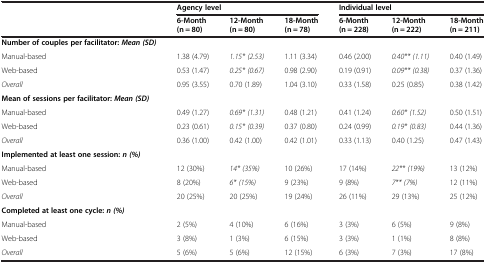

In [7]:
# Showing the raw image
from IPython.display import Image as displayImage
filename = img['filename']
displayImage("examples/"+filename)

In [8]:
# Extracting the HTML for the table from the annotation
html_string = format_html(img)
print(html_string)

<html>
 <head>
  <meta charset="utf-8"/>
  <style>
   table, th, td {
                     border: 1px solid black;
                     font-size: 10px;
                   }
  </style>
 </head>
 <body>
  <table frame="hsides" rules="groups" width="100%">
   <thead>
    <tr>
     <td rowspan="2">
     </td>
     <td colspan="3">
      <b>
       Agency level
      </b>
     </td>
     <td colspan="3">
      <b>
       Individual level
      </b>
     </td>
    </tr>
    <tr>
     <td>
      <b>
       6-Month (n = 80)
      </b>
     </td>
     <td>
      <b>
       12-Month (n = 80)
      </b>
     </td>
     <td>
      <b>
       18-Month (n = 78)
      </b>
     </td>
     <td>
      <b>
       6-Month (n = 228)
      </b>
     </td>
     <td>
      <b>
       12-Month (n = 222)
      </b>
     </td>
     <td>
      <b>
       18-Month (n = 211)
      </b>
     </td>
    </tr>
   </thead>
   <tbody>
    <tr>
     <td>
      <b>
       Number of couples per facilitator:
      </b>
  

In [9]:
# Rendering the above HTML in Jupyter Notebook for a more readable format
from IPython.core.display import display, HTML
display(HTML(html_string))